# db연결

In [1]:
import psycopg2

connect_db = "host ='SOMETHING' dbname = 'DATABASE'user = 'SYCHOI' password='PW'"
conn = psycopg2.connect(connect_db)
cur = conn.cursor()



In [2]:
cur.execute("SELECT * FROM tb_sns  ;")

# cur.execute("SELECT * FROM tb_sns where create_by not like '%jeju%' ;")

result = cur.fetchall()

import pandas as pd
sns = pd.DataFrame(result)
sns.columns =[desc[0] for desc in cur.description]

sns.head()

,index,create_at,sns_type,title,create_by,view_count,comment_count,contents
0,1,2019-12-12,인스타그램,제주핫플,jeju_source,39006,12,▶ 제주핫플\n\n.\n내 이럴줄 알았따?? #중문 #연돈 (포방터돈까스)\n드뎌 ...
1,2,2019-10-26,인스타그램,제주핫플,hawkeye_sehwa,25679,1,▶ 제주핫플\n\n제주의 맛?? 여기 어때요\n식신로드 흑돼지맛집??\n.\n??명...
2,3,2019-10-24,인스타그램,제주핫플,jeju_myeongridong,18135,1,▶ 제주핫플\n\n소문들어수꽈\n식신로드 흑돼지맛집??\n. .\n?? 명리동식당은...
3,4,2019-10-25,인스타그램,제주핫플,jeju_myeongridong_aewol,13078,1,▶ 제주핫플\n\n지금 있는곳에서 가까운 명리동식당으로??\n식신로드 흑돼지맛집??...
4,5,2019-10-31,인스타그램,제주핫플,hawkeye_sehwa,11924,1,▶ 제주핫플\n\n??바다가 보이는 고깃집\n??호크아이 사장님이 구워주는\n???...


# 전처리

In [3]:
sns.drop(['index'],axis = 1, inplace = True)

In [4]:
#중복제거
sns = sns.drop_duplicates(subset = ['contents'],keep = 'first')

In [5]:
sns.isnull().sum()

create_at        0
sns_type         0
title            0
create_by        1
view_count       0
comment_count    0
contents         1
dtype: int64

In [6]:
# null값 삭제하기

# sns.loc[sns.isnull()['create_by']]
# sns.loc[sns.isnull()['contents']]

sns.dropna(axis=0,inplace=True)

In [7]:
sns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14855 entries, 0 to 28147
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   create_at      14855 non-null  object
 1   sns_type       14855 non-null  object
 2   title          14855 non-null  object
 3   create_by      14855 non-null  object
 4   view_count     14855 non-null  int64 
 5   comment_count  14855 non-null  int64 
 6   contents       14855 non-null  object
dtypes: int64(2), object(5)
memory usage: 928.4+ KB


In [8]:
sns.loc[:3,:]

,create_at,sns_type,title,create_by,view_count,comment_count,contents
0,2019-12-12,인스타그램,제주핫플,jeju_source,39006,12,▶ 제주핫플\n\n.\n내 이럴줄 알았따?? #중문 #연돈 (포방터돈까스)\n드뎌 ...
1,2019-10-26,인스타그램,제주핫플,hawkeye_sehwa,25679,1,▶ 제주핫플\n\n제주의 맛?? 여기 어때요\n식신로드 흑돼지맛집??\n.\n??명...
2,2019-10-24,인스타그램,제주핫플,jeju_myeongridong,18135,1,▶ 제주핫플\n\n소문들어수꽈\n식신로드 흑돼지맛집??\n. .\n?? 명리동식당은...
3,2019-10-25,인스타그램,제주핫플,jeju_myeongridong_aewol,13078,1,▶ 제주핫플\n\n지금 있는곳에서 가까운 명리동식당으로??\n식신로드 흑돼지맛집??...


In [9]:
sns['sns_type'].unique()

array(['인스타그램', '다음카페', '네이버카페', '네이버블로그'], dtype=object)

In [10]:
#테그뽑기
import re

tag_list = []
for i in sns['contents']:
    try:
        tags = re.findall(r'#[^\s#,\\]+', i)
#         df_sns['tags'] = tags
        tag_list.append(tags)
    except:
        tags = ''
        tag_list.append(tags)

In [11]:
sns['tag'] = tag_list

# eda

In [12]:
# sns.to_csv('sns_tag.csv',encoding = 'utf-8',index=False)

In [13]:
import pandas as pd
sns = pd.read_csv('sns_tag.csv')

In [14]:
sns

,create_at,sns_type,title,create_by,view_count,comment_count,contents,tag
0,2019-12-12,인스타그램,제주핫플,jeju_source,39006,12,▶ 제주핫플\n\n.\n내 이럴줄 알았따?? #중문 #연돈 (포방터돈까스)\n드뎌 ...,"['#중문', '#연돈', '#웨이팅상황', '#제주여행', '#제주여행추천', '..."
1,2019-10-26,인스타그램,제주핫플,hawkeye_sehwa,25679,1,▶ 제주핫플\n\n제주의 맛?? 여기 어때요\n식신로드 흑돼지맛집??\n.\n??명...,[]
2,2019-10-24,인스타그램,제주핫플,jeju_myeongridong,18135,1,▶ 제주핫플\n\n소문들어수꽈\n식신로드 흑돼지맛집??\n. .\n?? 명리동식당은...,[]
3,2019-10-25,인스타그램,제주핫플,jeju_myeongridong_aewol,13078,1,▶ 제주핫플\n\n지금 있는곳에서 가까운 명리동식당으로??\n식신로드 흑돼지맛집??...,[]
4,2019-10-31,인스타그램,제주핫플,hawkeye_sehwa,11924,1,▶ 제주핫플\n\n??바다가 보이는 고깃집\n??호크아이 사장님이 구워주는\n???...,"['#제주핫플', '#명리동식당구좌점']"
...,...,...,...,...,...,...,...,...
14850,2019-10-17,인스타그램,제주핫플,truejj,0,2,▶ 제주핫플\n\n이것이 진정한 #힙트로 힙합! \n #제주도여행 도 이젠 힙하게 ...,"['#힙트로', '#제주도여행', '#갬성샷', '#제주사진놀이터', '#제주날씨'..."
14851,2019-10-17,인스타그램,제주핫플,young_9801,0,0,▶ 제주핫플\n\n아보카도요리와 코코넛오일로만든 요리가 주로 있습니다. \n점심부터...,"['#용담살롱', '#용담살롱', '#코코메기', '#cocomegi', '#제주공..."
14852,2019-10-17,인스타그램,제주핫플,truejj,0,0,▶ 제주핫플\n\n#미드 세트가 아니다! #제주존예여행지 #제주사진놀이터 다! 10...,"['#미드', '#제주존예여행지', '#제주사진놀이터', '#제주날씨', '#제주여..."
14853,2019-10-17,인스타그램,제주핫플,wasabi0602,0,0,▶ 제주핫플\n\n울집 귀염둥이들??\n오늘도 오픈입니다??\n #와사비 \nope...,"['#와사비', '#제주도맛집', '#제주스시', '#제주초밥', '#제주핫플', ..."


In [15]:
a = sns['contents']

In [16]:
#개행문자 없애기
if a is not None:
    row_a = a.replace("\n"," ")
else:
    row_a = ""

In [17]:
#한글 외 문자 지우는 함수
import re

def text_cleaning(text):
    korean = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = korean.sub('',text)
    return result



In [18]:
#젠체 적용
sns['korean'] = sns['contents'].apply(lambda x: text_cleaning(x))

In [19]:
sns['korean'].head(50)

0      제주핫플내 이럴줄 알았따 중문 연돈 포방터돈까스드뎌 오늘 시 개업오픈 대박쿠다 예...
1      제주핫플제주의 맛 여기 어때요식신로드 흑돼지맛집명리동식당은 제주시와 협약된 곳으로...
2      제주핫플소문들어수꽈식신로드 흑돼지맛집  명리동식당은 제주시와 협약된 곳으로 최고의...
3      제주핫플지금 있는곳에서 가까운 명리동식당으로식신로드 흑돼지맛집명리동식당은 제주시와...
4      제주핫플바다가 보이는 고깃집호크아이 사장님이 구워주는김치전골이 정말 기가막히는말만...
5      제주핫플믿고먹는 명리동식당 흑돼지식신로드 흑돼지맛집명리동식당은 제주시와 협약된 곳...
6      제주핫플믿고 먹는 식신로드 흑돼지맛집명리동식당은 제주시와 협약된 곳으로 최고의 신...
7      제주핫플일부터 정상영업 합니다가을에 미세먼지라니제주 하늘은 세상맑아요 언제봐도 멋...
8                               제주핫플제주맛집 제주태백산 제주핫플 존맛탱
9      제주핫플글로리아제주 글로리아스냅 제주도스냅 원래 혼자서 스냅사진을 준비를 할수있을...
10     제주핫플해피할로윈 이벤트 단호박머핀 을 구입하시면호박같은 귤을 서비스로 드려요 올...
11     제주핫플식신로드 흑돼지맛집명리동식당은 제주시와 협약된 곳으로 최고의 신선도와 육질...
12     질문글 또 생각나게하는 제주 핫플 맛집 카페 꿀팁 공유해보자난 댕댕님을 모시고 다...
13     제주핫플월일 애월 파크 가야되는 이유야보는 것 만해도 짜릿함을 느낄 수 있다   ...
14     제주핫플식신로드 흑돼지맛집  명리동식당은 제주시와 협약된 곳으로 최고의 신선도와 ...
15     제주핫플일요일테스트 피자생각에 의한 생각의 즉흥으로 탄생한 피자 테스트느낌 좋은가...
16     제주도 서귀포시 올레시장 게판오분전숙소가 곁이다보니올레시장에서 먹게되네요 ㅎㅎ요즘...
17     제주핫플월요일한주의 시작입니다날씨도 참 좋으네요맛점과함께 날씨처럼 눈이부시

In [20]:
key_word =['성산','성산점','우도지점','성산읍','성산리','오조리','시흥리','고성리','신양리','수산1리','수산2리','수산리',
 '난산리','신산리','삼달1리','삼달2리','삼달리','삼달','신풍리','신풍','신천리',
 '성산포','성산일출봉','성산일출해양도립공원','두모악','신양해수욕장','신양해변',
 '신양섭지코지해변','섭지코지','광치기','광치기해변','혼인지','일출랜드',
 '멍에승마장','이어도','이어도 승마장','우리승마장','신풍항','삼달항',
 '온평중동항','신양동항','오조항','시흥항','성산항','동남초','성산초',
 '수산초','시흥초','신산초','온평초','풍천초','성산중','신산중','성산고',
           '우도','우도면','오봉리','서광리','천진리','조일리','우도점','우도지점',#리별
           '상우목동','상우목','하우목동','하우목','중앙동','동천진','서천진',#자연마을
           '비양','비양동','영일동','주흥동','주흥','전흘','전흘동','삼양동','삼양',
           '상고수동','상고수','하고수동','주간명월','달그린안','야항어범','천진관산',#우도8경
           '지두청사','전포망도','후해석벽','동안경굴','서빈백사','홍조단괴해빈','단괴해빈','우도8경',
           '우도팔경','우도땅콩','우도엔','우도봉','연평리','하우목동','우도해양도립공원','우도올레',
           '방사탑','우도초','우도중','산호사물커','검멀레','쇠머리오름','땅콩마을','우도등대','우도마늘',
           '우도쪽파','우도소라','우뭇가사리','우도산호','우도봉','우도등대' ]

key = pd.Series(key_word)

In [21]:
# 해당 키워드를 포함하는 열만 찾기 
# https://emilkwak.github.io/pandas-contains-multiple


a =sns[sns['contents'].apply(lambda x: any( i in x for i in ['성산','성산점','우도지점','성산읍','성산리','오조리','시흥리','고성리','신양리','수산1리','수산2리','수산리',
 '난산리','신산리','삼달1리','삼달2리','삼달리','삼달','신풍리','신풍','신천리',
 '성산포','성산일출봉','성산일출해양도립공원','두모악','신양해수욕장','신양해변',
 '신양섭지코지해변','섭지코지','광치기','광치기해변','혼인지','일출랜드',
 '멍에승마장','이어도','이어도 승마장','우리승마장','신풍항','삼달항',
 '온평중동항','신양동항','오조항','시흥항','성산항','동남초','성산초',
 '수산초','시흥초','신산초','온평초','풍천초','성산중','신산중','성산고',
           '우도','우도면','오봉리','서광리','천진리','조일리','우도점','우도지점',
          '상우목동','상우목','하우목동','하우목','중앙동','동천진','서천진',
           '비양','비양동','영일동','주흥동','주흥','전흘','전흘동','삼양동','삼양',
           '상고수동','상고수','하고수동','주간명월','달그린안','야항어범','천진관산',
           '지두청사','전포망도','후해석벽','동안경굴','서빈백사','홍조단괴해빈','단괴해빈','우도8경',
           '우도팔경','우도땅콩','우도엔','우도봉','연평리','하우목동','우도해양도립공원','우도올레',
           '방사탑','우도초','우도중','산호사물커','검멀레','쇠머리오름','땅콩마을','우도등대','우도마늘',
           '우도쪽파','우도소라','우뭇가사리','우도산호','우도봉','우도등대']))]

In [22]:
a.info()

sns_ss = a

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1884 entries, 15 to 14853
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   create_at      1884 non-null   object
 1   sns_type       1884 non-null   object
 2   title          1884 non-null   object
 3   create_by      1884 non-null   object
 4   view_count     1884 non-null   int64 
 5   comment_count  1884 non-null   int64 
 6   contents       1884 non-null   object
 7   tag            1884 non-null   object
 8   korean         1884 non-null   object
dtypes: int64(2), object(7)
memory usage: 147.2+ KB


# sns_ss

In [23]:
# import re

# place_list = []

# for i, content in enumerate(sns['contents']):
#     for find in key_word:
#         try:
#             place = re.findall(r'{}+'.format(find), i)
#             if place:
#                 place_list.append(place)
#             else:
#                 place_list.append('drop')

#         except:
                   
#             place = ''
#             place_list.append(place)

In [24]:
sns_ss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1884 entries, 15 to 14853
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   create_at      1884 non-null   object
 1   sns_type       1884 non-null   object
 2   title          1884 non-null   object
 3   create_by      1884 non-null   object
 4   view_count     1884 non-null   int64 
 5   comment_count  1884 non-null   int64 
 6   contents       1884 non-null   object
 7   tag            1884 non-null   object
 8   korean         1884 non-null   object
dtypes: int64(2), object(7)
memory usage: 147.2+ KB


In [25]:
#날짜자르기
import datetime
sns_ss['create_at'] = sns_ss['create_at'].astype('datetime64[ns]')
# a= pd.Series(sns['create_at'])
# datetime.datetime.strptime(a,"%Y%m%d").date()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
sns_ss = sns_ss.sort_values(by = 'create_at')



In [27]:
sns_ss.index= sns_ss['create_at']

a= sns_ss.loc['20190501':'20190831']

sns_ss = a.reset_index(drop = True)

sns_ss

,create_at,sns_type,title,create_by,view_count,comment_count,contents,tag,korean
0,2019-05-01,네이버블로그,"먹쿠슬낭,제주핫플,제주카페,제주맛집,제주애플망고빙수,애플망고파이,에이드",쿠실장,0,2,"▶ 먹쿠슬낭,제주핫플,제주카페,제주맛집,제주애플망고빙수,애플망고파이,에이드\n\n먹...",[],먹쿠슬낭제주핫플제주카페제주맛집제주애플망고빙수애플망고파이에이드먹쿠슬낭 애망빙 일곱번...
1,2019-05-02,네이버블로그,제주 이익새양과점 귀여운 캐릭터에 반해 간 한림빵집 파운드케이크/밀크티 JMT,Day to day,0,5,▶ 제주 이익새양과점 귀여운 캐릭터에 반해 간 한림빵집 파운드케이크/밀크티 JMT\...,"['#제주이색빵집', '#제주인스타핫플', '#한림빵집', '#국내여행', '#제주...",제주 이익새양과점 귀여운 캐릭터에 반해 간 한림빵집 파운드케이크밀크티 제주도빵집 ...
2,2019-05-02,네이버블로그,"진짜 제주맛집 :: 생이소리, 옥돔구이정식 고등어구이정식 솔직후기",유니크앨리스,0,4,"▶ 진짜 제주맛집 :: 생이소리, 옥돔구이정식 고등어구이정식 솔직후기\n\n? ? ...","['#유채꽃맛집', '#제주유채꽃밭', '#제주유채꽃사진', '#제주유채꽃', '#...",진짜 제주맛집 생이소리 옥돔구이정식 고등어구이정식 솔직후기 우리 복둥이 생후...
3,2019-05-02,네이버블로그,월정리 가볼만한곳 백호아방 존맛,브라우니왈왈왈왈,0,0,▶ 월정리 가볼만한곳 백호아방 존맛\n\n? 월정리 가볼만한곳 월정리 해변 맛집 백...,[],월정리 가볼만한곳 백호아방 존맛 월정리 가볼만한곳 월정리 해변 맛집 백호아방 완연...
4,2019-05-02,네이버블로그,/ 제주여행 3일차 : 금호리조트 - 남원큰엉 - 협재 푸리또 - 금능바다 PARA...,왈패,0,8,▶ / 제주여행 3일차 : 금호리조트 - 남원큰엉 - 협재 푸리또 - 금능바다 PA...,"['#제주도여행', '#제주여행', '#jeju', '#제주핫플', '#제주카페',...",제주여행 일차 금호리조트 남원큰엉 협재 푸리또 금능바다 드디어 막을...
...,...,...,...,...,...,...,...,...,...
433,2019-08-30,네이버블로그,성산게스트하우스 성산핫플게스트하우스에서 불면증 고쳐드립니다!! 꿀잠보장 드루와드루...,성산 핫플,0,0,▶ 성산게스트하우스 성산핫플게스트하우스에서 불면증 고쳐드립니다!! 꿀잠보장 드루와...,[],성산게스트하우스 성산핫플게스트하우스에서 불면증 고쳐드립니다 꿀잠보장 드루와드루와...
434,2019-08-31,네이버블로그,(제주애견펜션)소 행 복!!!,휘게 하우스 인 제주,0,0,▶ (제주애견펜션)소 행 복!!!\n\n먹고 자고 놀고 ? 가끔은 ? 이 아이들이 ...,"['#제주애견펜션추천', '#제주대형견동반여행', '#제주허브동산', '#일출랜드'...",제주애견펜션소 행 복먹고 자고 놀고 가끔은 이 아이들이 부러을때도 있다 저...
435,2019-08-31,네이버블로그,성산일출봉게스트하우스 왜 떠나질 못해~ 연박주의~!!!!!! 성산핫플게스트하우스,성산 핫플,0,0,▶ 성산일출봉게스트하우스 왜 떠나질 못해~ 연박주의~!!!!!! 성산핫플게스트하우...,[],성산일출봉게스트하우스 왜 떠나질 못해 연박주의 성산핫플게스트하우스안녕하세요 성산...
436,2019-08-31,네이버블로그,볼거리 놀거리가 많은 성산게스트하우스 성산핫플 게스트하우스,성산 핫플,0,0,▶ 볼거리 놀거리가 많은 성산게스트하우스 성산핫플 게스트하우스\n\n안녕하세요! 성...,[],볼거리 놀거리가 많은 성산게스트하우스 성산핫플 게스트하우스안녕하세요 성산게스트하우...


In [28]:
sns_ss['sns_type'].value_counts()

네이버블로그    436
네이버카페       1
인스타그램       1
Name: sns_type, dtype: int64

In [29]:
# 콘테츠 드랍

sns_ss.drop(['contents'],axis =1,inplace = True)
sns_ss['comment_count'].value_counts()

0     287
1      43
2      39
4      14
3       9
5       9
6       7
10      6
12      4
7       4
8       3
16      3
9       2
11      1
41      1
13      1
15      1
17      1
20      1
39      1
76      1
Name: comment_count, dtype: int64

In [30]:
sns_ss.to_csv('sns_ss.csv',encoding = 'utf-8',index=False)


# 워드클라우드

In [32]:
#리스트화 
kor = "".join(sns_ss['korean'].tolist())

kor

' 먹쿠슬낭제주핫플제주카페제주맛집제주애플망고빙수애플망고파이에이드먹쿠슬낭 애망빙 일곱번째 시즌    제주산 생애플망고 제주우유 애플망고수제연유 애플망고수제아이스크림  프리미엄급 재료에 정성 배 더하기  망고소스나 시럽 등의 인위적인 맛 가미하지 않아 순수한 맛 그대로를 즐기실 수 있어요 시간 이상 불옆에서 꼼짝않고 끓여야 하는 애플망고연유 매일 정성 들여 만들고 있구요 애플망고아이스크림도 직접 수제로 만들고 있어요  애플망고빙수 빅 시즌이 점점 더 가까워지고 있네요 이번 시즌엔 먹쿠슬낭에서 더 많은 분 만나뵙길    년 신메뉴 애플망고파이  파이 결 장난 아니죠 바삭한 맛 제대로 즐기시라고 시간대별로 조금씩 구워내고 있어요  달콤한 애플망고맛과 바삭한 파이맛 환상이랍니다  애플망고파이맛 상상이 되시나요ㅎㅎ 놓치면 후회하실맛ㅋㅋ    애플망고토스트우도땅콩토스트도 여전히 사랑받고 있는 메뉴입니다 간단한 브런치로 즐기셔도 좋아요 아메리카노 원입니다 놀랍지 않나요 이제 눈탱이커피 드시지 마시고ㅋㅋ 먹쿠슬낭 커피 드시러오시는걸루 블루베리요거트  제주 블루베리 시즌이 돌아와서 이틀전 오픈된 메뉴입니다 애플망고요거트 딸기요거트 요렇게 등록되어 있습니다 요구르트는 친환경인증 아침미소목장에서 생산되는 요구르트를 사용하고 있어요 단가가 높지만 그냥 좋은원료를 쓰고싶은 제욕심입니다   애플망고빙수와 역사를 같이 한 애플망고주스입니다 제주애플망고로 만들었구요 걸쭉하고 진한 주스맛을 즐기실 수 있답니다   베리베리에이드  제주블루베리 시즌에 맞춰 출시된 신메뉴입니다 제가 만들어 제가 반한 맛 요고요고 진짜 맛있어욤 ㅠㅠ   민트와 베리과일 꾹꾹 눌러 먹는 이 맛 온 몸에 충전 제대로 되는 느낌입니다ㅎㅎ   제주딸기로 만든 딸기라떼와 딸기에이드   제주유기농 녹차로 만든 말차라떼 달콤쌉싸름한 녹차라떼맛에 빠져드실거예요   제주뎅유자에이드  먹쿠슬낭은 시판용 소스 쓰지 않고 직접 청을 담궈 사용하고 있어요 맛있고 건강한 맛 보장하겠습니다   한라봉에이드 천혜향에이드 아직 소개할 메뉴가 많

In [33]:
#단어 추출
from konlpy.tag import Okt
from collections import Counter

nouns_tagger = Okt()
nouns = nouns_tagger.nouns(kor)
count = Counter(nouns)

count

Counter({'쿠슬': 2,
         '낭': 4,
         '제주': 4617,
         '핫': 3135,
         '카페': 825,
         '맛집': 1004,
         '애플': 21,
         '망고': 33,
         '빙수': 9,
         '파이': 5,
         '이드': 40,
         '애망빙': 1,
         '일곱': 1,
         '시즌': 16,
         '주산': 26,
         '생': 28,
         '우유': 20,
         '연유': 2,
         '수제': 32,
         '아이스크림': 99,
         '프리미엄': 22,
         '재료': 71,
         '정성': 22,
         '배': 170,
         '더하기': 1,
         '소스': 31,
         '시럽': 26,
         '등': 173,
         '인위': 5,
         '맛': 559,
         '가미': 2,
         '그대로': 28,
         '수': 752,
         '시간': 444,
         '이상': 30,
         '불옆': 1,
         '꼼짝': 3,
         '매일': 121,
         '직접': 114,
         '빅': 5,
         '점점': 20,
         '더': 428,
         '이번': 132,
         '먹쿠슬낭': 4,
         '분': 466,
         '년': 95,
         '메뉴': 236,
         '결': 3,
         '장난': 21,
         '바삭': 16,
         '제대로': 66,
         '시간대': 5,
         '

In [34]:
#한글자삭제  #삭제 후 총 8320개
remove_one = Counter({x: count[x] for x in count if len(x)>1})
print(remove_one)

Counter({'게스트하우스': 5523, '제주': 4617, '제주도': 3529, '성산': 3505, '파티': 2525, '우도': 1635, '추천': 1141, '맛집': 1004, '서귀포': 915, '성산일출봉': 908, '여행': 903, '서비스': 903, '보관': 844, '카페': 825, '돼지': 646, '사진': 640, '숙소': 631, '근처': 590, '레이스': 541, '저희': 505, '애견': 493, '전기차': 489, '특별자치도': 466, '시간': 444, '터미널': 402, '여객': 400, '오늘': 391, '항짐': 390, '정말': 378, '게스트': 374, '바다': 357, '갈치': 328, '생각': 327, '진짜': 320, '애월': 319, '우리': 318, '제주시': 316, '서귀포시': 310, '사람': 309, '바로': 290, '고기': 257, '펜션': 257, '살이': 247, '전복': 238, '하나': 237, '메뉴': 236, '성산읍': 234, '여기': 224, '예약': 213, '주문': 212, '느낌': 211, '구이': 200, '박스': 196, '해변': 193, '정도': 191, '친구': 189, '수국': 188, '역시': 187, '시작': 187, '조림': 186, '분위기': 185, '아이': 185, '문의': 181, '아주': 180, '스텝': 178, '날씨': 173, '코스': 171, '동반': 169, '소개': 167, '칵테일': 166, '버스': 164, '푸딩': 163, '식당': 161, '그냥': 160, '다음': 160, '음식': 159, '이용': 158, '바베큐': 158, '섭지코지': 155, '삼촌': 154, '어제': 153, '한번': 152, '정리': 152, '준비': 152, '커피': 150, '조금': 149, '로번': 147, 

In [105]:
remove_one


Counter({'쿠슬': 2,
         '제주': 4617,
         '카페': 825,
         '맛집': 1004,
         '애플': 21,
         '망고': 33,
         '빙수': 9,
         '파이': 5,
         '이드': 40,
         '애망빙': 1,
         '일곱': 1,
         '시즌': 16,
         '주산': 26,
         '우유': 20,
         '연유': 2,
         '수제': 32,
         '아이스크림': 99,
         '프리미엄': 22,
         '재료': 71,
         '정성': 22,
         '더하기': 1,
         '소스': 31,
         '시럽': 26,
         '인위': 5,
         '가미': 2,
         '그대로': 28,
         '시간': 444,
         '이상': 30,
         '불옆': 1,
         '꼼짝': 3,
         '매일': 121,
         '직접': 114,
         '점점': 20,
         '이번': 132,
         '먹쿠슬낭': 4,
         '메뉴': 236,
         '장난': 21,
         '바삭': 16,
         '제대로': 66,
         '시간대': 5,
         '별로': 39,
         '환상': 21,
         '랍니': 32,
         '상상': 9,
         '후회': 22,
         '토스트': 7,
         '우도': 1635,
         '땅콩': 127,
         '브런치': 17,
         '아메리카노': 32,
         '이제': 133,
         '커피': 

In [106]:
stopwords = '제주도 제주 서귀포 서귀포시 게스트 성산 우도 성산읍 추천 보관 정글북 자기 어제 구경 모두 매일 사진 오늘 보고 한도 제주시 사장 저희 특별자치도 애견 항짐 시간 근처 아주 동반 버스 그냥 다음 이용 레이스 삼촌 정리 준비 조금 로번 한번 사실 때문 이번 이제 정말 생각 진짜 우리 사람 바로 하나 메뉴 여기 박스 역시 정도 시작 문의 방문 설거지 애월 살이 모습 마음 다른 예약 주문 느낌 한림 때문 친구 아이 코스 소개 '
stopwords = stopwords.split()

remove_word = Counter({x: remove_one[x] for x in remove_one if x not in stopwords})
# print(remove_word)
# len(remove_word)

## pytag

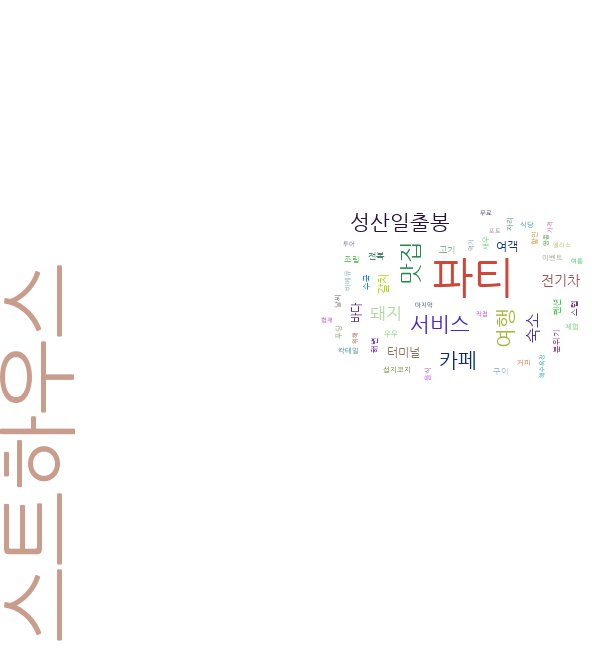

In [107]:
import random
import pytagcloud
import webbrowser

rank_tag = remove_word.most_common(50)
taglist = pytagcloud.make_tags(rank_tag,maxsize=80)
pytagcloud.create_tag_image(taglist,'a.jpg',size=(1000,650),
                           fontname='NanumGothic',rectangular= False)

from IPython.display import Image
Image(filename='a.jpg')

## wordcloud

In [108]:
import matplotlib
from matplotlib import font_manager, rc
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


matplotlib.rcParams['axes.unicode_minus'] = False   

remove_word # 카운터

word_df # 데이터프레임 100개 



In [109]:
remove_word

Counter({'쿠슬': 2,
         '카페': 825,
         '맛집': 1004,
         '애플': 21,
         '망고': 33,
         '빙수': 9,
         '파이': 5,
         '이드': 40,
         '애망빙': 1,
         '일곱': 1,
         '시즌': 16,
         '주산': 26,
         '우유': 20,
         '연유': 2,
         '수제': 32,
         '아이스크림': 99,
         '프리미엄': 22,
         '재료': 71,
         '정성': 22,
         '더하기': 1,
         '소스': 31,
         '시럽': 26,
         '인위': 5,
         '가미': 2,
         '그대로': 28,
         '이상': 30,
         '불옆': 1,
         '꼼짝': 3,
         '직접': 114,
         '점점': 20,
         '먹쿠슬낭': 4,
         '장난': 21,
         '바삭': 16,
         '제대로': 66,
         '시간대': 5,
         '별로': 39,
         '환상': 21,
         '랍니': 32,
         '상상': 9,
         '후회': 22,
         '토스트': 7,
         '땅콩': 127,
         '브런치': 17,
         '아메리카노': 32,
         '커피': 150,
         '블루베리': 17,
         '요거트': 3,
         '이틀': 9,
         '오픈': 69,
         '딸기': 22,
         '등록': 3,
         '요구르트': 2,
   

In [110]:
a = remove_word.most_common(100)
word_df = pd.DataFrame(a)
word_df.columns = ['tags','counts']
word_df

,tags,counts
0,게스트하우스,5523
1,파티,2525
2,맛집,1004
3,성산일출봉,908
4,여행,903
...,...,...
95,아침,78
96,내부,78
97,입구,78
98,하루,78


In [111]:
a

[('게스트하우스', 5523),
 ('파티', 2525),
 ('맛집', 1004),
 ('성산일출봉', 908),
 ('여행', 903),
 ('서비스', 903),
 ('카페', 825),
 ('돼지', 646),
 ('숙소', 631),
 ('전기차', 489),
 ('터미널', 402),
 ('여객', 400),
 ('바다', 357),
 ('갈치', 328),
 ('고기', 257),
 ('펜션', 257),
 ('전복', 238),
 ('구이', 200),
 ('해변', 193),
 ('수국', 188),
 ('조림', 186),
 ('분위기', 185),
 ('스텝', 178),
 ('날씨', 173),
 ('칵테일', 166),
 ('푸딩', 163),
 ('식당', 161),
 ('음식', 159),
 ('바베큐', 158),
 ('섭지코지', 155),
 ('커피', 150),
 ('체험', 146),
 ('자리', 145),
 ('우무', 142),
 ('새우', 142),
 ('할인', 141),
 ('이벤트', 141),
 ('투어', 131),
 ('여름', 130),
 ('가격', 128),
 ('땅콩', 127),
 ('무료', 126),
 ('해수욕장', 125),
 ('포토', 116),
 ('먹기', 115),
 ('마지막', 115),
 ('위해', 115),
 ('직접', 114),
 ('협재', 113),
 ('앨리스', 111),
 ('요즘', 110),
 ('처음', 109),
 ('위치', 109),
 ('기분', 107),
 ('호텔', 106),
 ('다시', 105),
 ('도착', 105),
 ('완전', 105),
 ('바람', 105),
 ('포장', 104),
 ('식사', 104),
 ('주차', 102),
 ('혼자', 101),
 ('고등어', 100),
 ('아이스크림', 99),
 ('함덕', 99),
 ('공항', 98),
 ('가게', 98),
 ('지금', 97),
 ('음료', 97),

In [112]:
word_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tags    100 non-null    object
 1   counts  100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [113]:
# #데이터프레임화
# word_count = sorted(remove_word.items(), key=lambda x:x[1], reverse=True)
# word_df = pd.DataFrame(word_count)
# word_df.columns=['tags','counts']

In [119]:
word_50 =word_df.loc[:50]
word_40 =word_df.loc[:40]
word_30 =word_df.loc[:30]
word_20 =word_df.loc[:19]
word_10 =word_df.loc[:10]

# word_df.info()
# word_50.info()

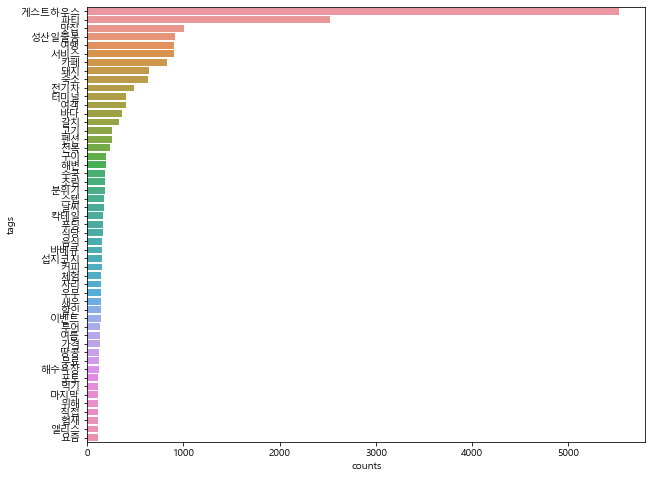

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,8))
sns.barplot(x='counts',y='tags',data=word_50)

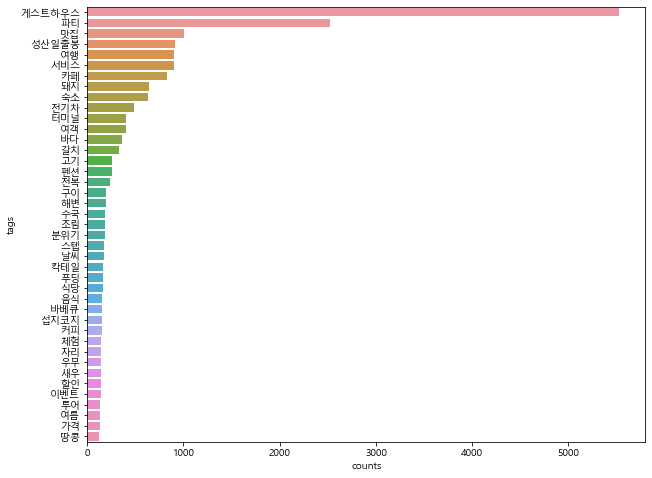

In [116]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.barplot(x='counts',y='tags',data=word_40)

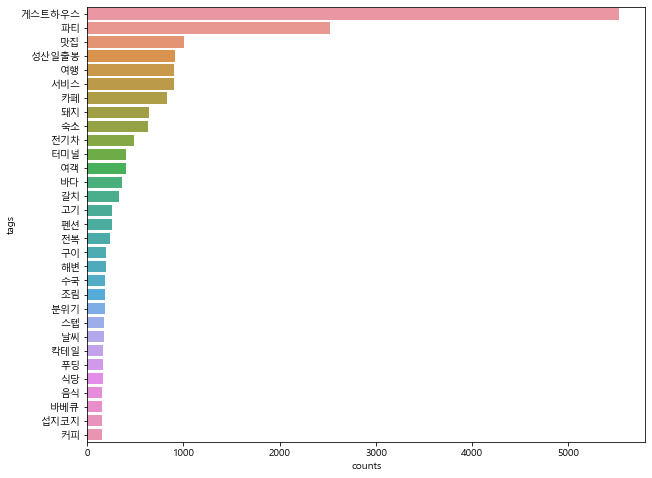

In [117]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.barplot(x='counts',y='tags',data=word_30)

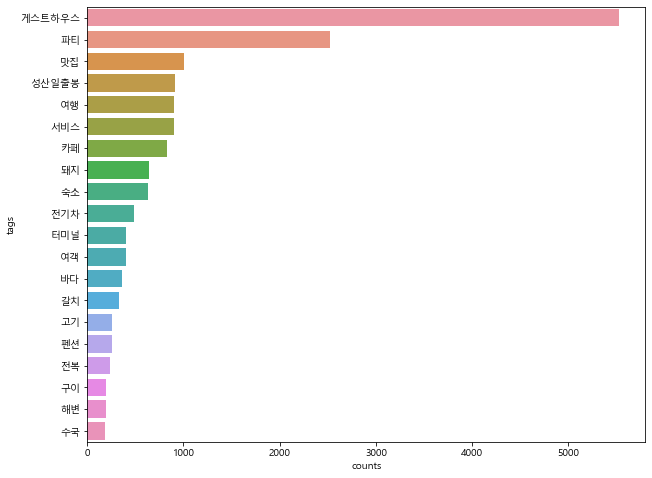

In [120]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.barplot(x='counts',y='tags',data=word_20)

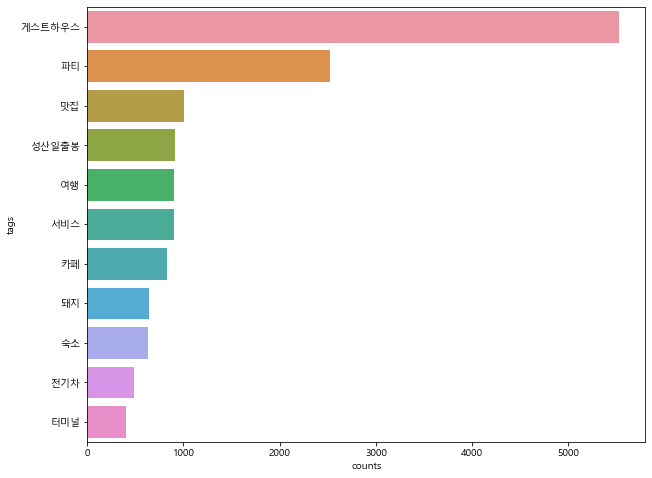

In [97]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.barplot(x='counts',y='tags',data=word_10)

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import platform


font_path = 'c:/Windows/Fonts/malgun.ttf'


In [99]:
# text = open('alice.txt').read()

# import numpy as np
# from PIL import Image
# from wordcloud import STOPWORDS


# plane_mask = np.array(Image.open('airplane.png'))
# stopwords = set(STOPWORDS)
# stopwords.add('said')

In [100]:
# plt.figure(figsize=(8,8))
# plt.imshow(plane_mask,cmap=plt.cm.gray,interpolation ='bilinear')
# plt.axis('off')
# plt.show()

In [101]:
# wc = WordCloud(background_color='white',max_words=2000,mask=plane_mask,
#               stopwords=stopwords)
# wc = wc.generate(text)
# wc.words_

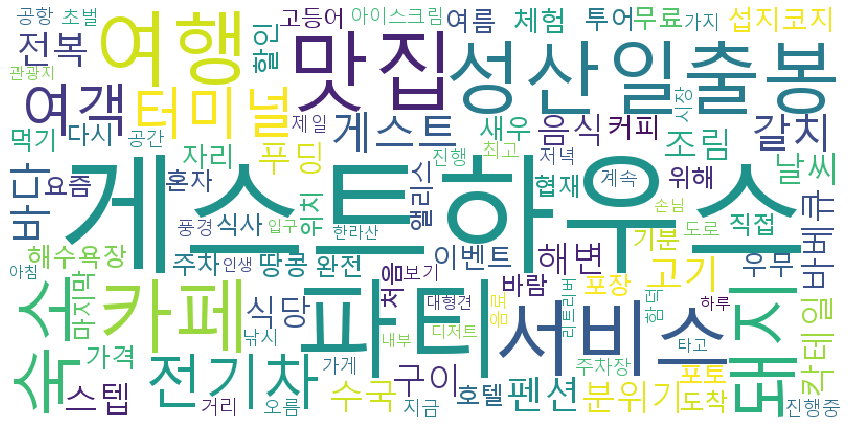

In [102]:




wordcloud = WordCloud(font_path = font_path, 
                      background_color = 'white', 
                       max_words=100, 
                      relative_scaling=0.3, 
                      width=800,
                      height=400).generate_from_frequencies(remove_word)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud3')

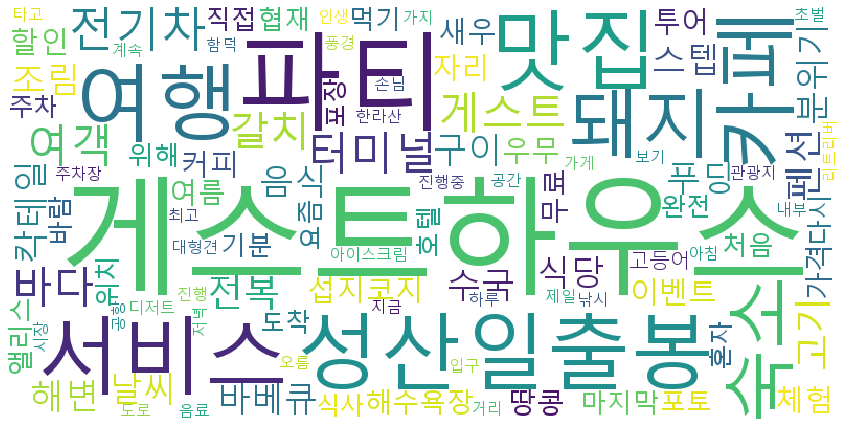

In [103]:


wordcloud = WordCloud(font_path = font_path, 
                      background_color = 'white', 
                       max_words=100, 
                      relative_scaling=0.3, 
                      width=800,
                      height=400).generate_from_frequencies(remove_word)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud3')

# 성산  키워드

- 행정구역
    - 성산리
    - 오조리**
    - 시흥리
    - 고성리**
    - 신양리
    - 수산1리
    - 수산2리
    - 온평리*
    - 난산리
    - 신산리
    - 삼달1리
    - 삼달2리
    - 신풍리
    - 신천리
    
- 관광지
    - 성산포
    - 성산일출봉 - 세계자연유산
    - 성산일출해양도립공원
    - 두모악
    - 신양해수욕장/신양섭지코지해변
    - 섭지코지
    - 광치기해변
    - 혼인지
    - 일출랜드
    - 승마장
       - 멍에 승마장
       - 이어도 승마장
       - 우리승마장
       
- 항구
    - 신풍항
    - 삼달항
    - 온평중동항
    - 신양동항
    - 오조항
    - 시흥항
    - 성산항
 
- 학교
    - 동남초등학교
    - 성산초등학교
    - 수산초등학교
    - 시흥초등학교
    - 신산초등학교
    - 온평초등학교
    - 풍천초등학교
    - 성산중학교
    - 신산중학교
    - 성산고등학교
    
 #성산  키워드

['성산','성산읍','성산리','오조리','시흥리','고성리','신양리','수산1리','수산2리','수산리',
 '난산리','신산리','삼달1리','삼달2리','삼달리','신풍리','신천리',
 '성산포','성산일출봉','성산일출해양도립공원','두모악','신양해수욕장',
 '신양섭지코지해변','섭지코지','광치기해변','혼인지','일출랜드',
 '멍에승마장','이어도 승마장','우리승마장','신풍항','삼달항',
 '온평중동항','신양동항','오조항','시흥항','성산항','동남초','성산초',
 '수산초','시흥초','신산초','온평초','풍천초','성산중','신산중','성산고']

# 우도 키워드

'우도','우도면','오봉리','서광리','천진리','조일리','우도점','우도지점',
          '상우목동','상우목','하우목동','하우목','중앙동','동천진','서천진',
           '비양','비양동','영일동','주흥동','주흥','전흘','전흘동','삼양동','삼양',
           '상고수동','상고수','하고수동','주간명월','달그린안','야항어범','천진관산',
           '지두청사','전포망도','후해석벽','동안경굴','서빈백사','홍조단괴해빈','단괴해빈','우도8경',
           '우도팔경','우도땅콩','우도엔','우도봉','연평리','하우목동','우도해양도립공원','우도올레',
           '방사탑','우도초','우도중','산호사물커','검멀레','쇠머리오름','땅콩마을','우도등대','우도마늘',
           '우도쪽파','우도소라','우뭇가사리','우도산호','우도봉','우도등대']))]

# 광고제거

#cur.execute("SELECT * FROM tb_sns where create_by not like '%jeju%' ;")
